# Notes
* try multiple blocks 3,5,6,7
* try cross validation
* try bagging samples.
* try one month at a time
* try one day at a time.
For LA sanfrancisco

For NYC- Manhattan

* Try hierarchical learning. 

In [1]:
from lib import gradient_mixed
from lib import visualize
from lib import mixmem_aux

import pandas as pd
import math
import random
import numpy as np
import scipy as scp
import scipy.stats as stats
import matplotlib.pyplot as plt

gradient_descent = gradient_mixed.gradient_descent
realistic_initial = gradient_mixed.realistic_initial
likelihood = mixmem_aux.likelihood
mu_likelihood = mixmem_aux.mu_likelihood

scatterplot_city = visualize.scatterplot_city
block_omegas = visualize.block_omegas


In [3]:
LAdf = pd.read_csv("../data/cleaned/LA16_cleaned_final_no_weekend.csv")
LA_stations_dups = list(LAdf['start_station_id'])
LA_lat = list(LAdf['start_lat'])
LA_lon = list(LAdf['start_lon'])
LA_station_info = dict(zip(LA_stations_dups, zip(LA_lat, LA_lon)))
LA_stations = list(set(LA_stations_dups))
LA_stations.sort()
LA_N = len(LA_stations)
LA_matrix = np.zeros([LA_N, LA_N, 24])
for index, row in LAdf.iterrows():
    i = LA_stations.index(row['start_station_id'])
    j = LA_stations.index(row['end_station_id'])
    t = int(row['start_time'].split(':')[0].split(' ')[1])
    LA_matrix[i, j, t] += 1

In [62]:
NYdf = pd.read_csv("../data/cleaned/ny1610_hm_no_weekend.csv")
NY_stations_dups = list(NYdf['Start.Station.ID'])
NY_lat = list(NYdf['Start.Station.Longitude'])
NY_lon = list(NYdf['Start.Station.Latitude'])
NY_station_info = dict(zip(NY_stations_dups, zip(NY_lat, NY_lon)))
NY_stations = list(set(NY_stations_dups))
NY_stations.sort()
NY_N = len(NY_stations)
NY_matrix = np.zeros([NY_N, NY_N, 24])
for index, row in NYdf.iterrows():
    #if ~row['weekend']:
    i = NY_stations.index(row['Start.Station.ID'])
    j = NY_stations.index(row['End.Station.ID'])
    t = int(row['Start.Time'].split(':')[0].split(' ')[1])
    NY_matrix[i, j, t] += 1

In [57]:
numiter=10000
numblocks=10
r0,c0=realistic_initial(LA_matrix,LA_N,numblocks)
LAr_fit, LAc_fit, wr, wc = \
gradient_descent(LA_matrix, r0, c0, N=numiter,sig_digs=3, N_stable=600, nblocks = numblocks, verbose_time = 100)

N: 	 C_RelChange 	 R_RelChange 	 log_like 	 d_log_like 	 time(s)
0	 7.1274e-01	 7.1756e-05	 -5.1493e+04	 1.8222e+04	 0.21
100	 1.7903e-02	 1.5172e-02	 -3.2946e+04	 8.1670e+01	 23.05
200	 9.4969e-03	 9.7311e-03	 -2.7477e+04	 2.0932e+01	 46.83
300	 7.2284e-03	 9.0911e-03	 -2.6315e+04	 1.7648e+01	 68.69
400	 2.6573e-03	 1.4771e-03	 -2.5717e+04	 3.6925e+00	 92.48
500	 6.9903e-04	 1.1450e-03	 -2.5558e+04	 5.4588e-01	 116.68
600	 7.9402e-04	 6.0022e-04	 -2.5515e+04	 3.9531e-01	 142.18
700	 4.0194e-04	 5.2952e-04	 -2.5489e+04	 1.0144e-01	 163.46
800	 3.8414e-04	 2.6934e-04	 -2.5480e+04	 7.3162e-02	 185.12
900	 2.4041e-04	 2.7586e-04	 -2.5474e+04	 4.3618e-02	 207.79
1000	 3.0929e-04	 2.9438e-04	 -2.5470e+04	 4.8954e-02	 228.98
1100	 1.9440e-04	 1.5982e-04	 -2.5465e+04	 3.4175e-02	 250.33
4.248331467310588Minutes
Stopping criterion met


10


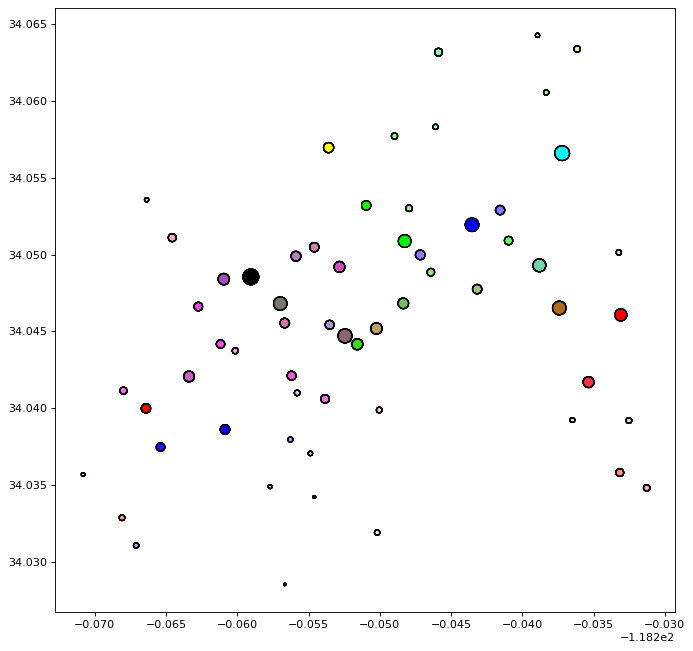

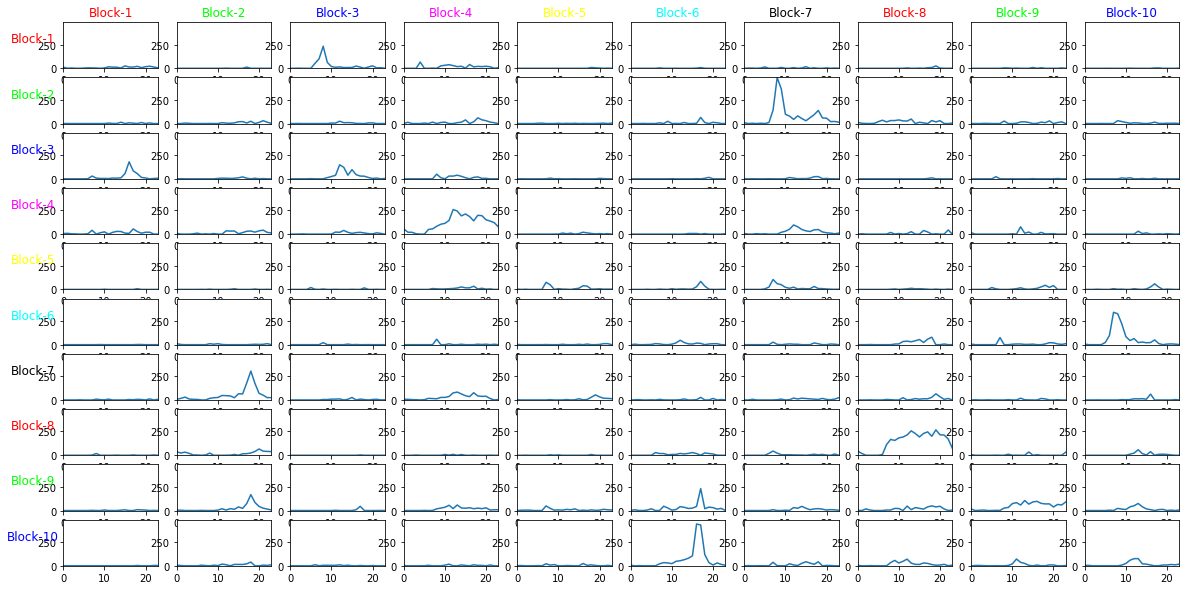

In [58]:
LA_weights=np.sum(LA_matrix,(1,2))+np.sum(LA_matrix,(0,2))
LA_sizes=LA_weights/15;
LA_colors=LAc_fit/np.max(LAc_fit,0,keepdims=True)
scatterplot_city(LAc_fit,LA_N,numblocks,np.array([list(LA_station_info[x]) for x in LA_stations])
                     ,sizes=LA_sizes)
block_omegas(LAr_fit,numblocks)

In [43]:
def scatterplot_block(c,N,numblocks,positions,colorlist=None,sizes=30,filename=None):
    colors=c/np.max(c,0,keepdims=True)
    block_colors=np.zeros([numblocks,N,4])
    if colorlist is None:
        colorlist=np.array([[1,0,0],[0,0,0]])
    print(numblocks)
    fig=plt.figure(figsize=(30,10), dpi= 80, facecolor='w', edgecolor='k')
    for i in range(0,numblocks):
        fig.add_subplot(1,numblocks,i+1)
        plt.scatter(positions[:,1]
                    , positions[:,0]\
                    ,c=np.ones([N,3])-\
                    np.expand_dims(colors[:,i],[1])*np.expand_dims(np.array([0,1,1]),[0])\
                                      ,s=sizes,edgecolors='k')
        #print(np.expand_dims(colors[:,i],[1])*np.expand_dims(np.array([1,0,0]),[0]))
        #print(colors)
    if not(filename is None):
        plt.savefig(filename+"scatter.png")

10


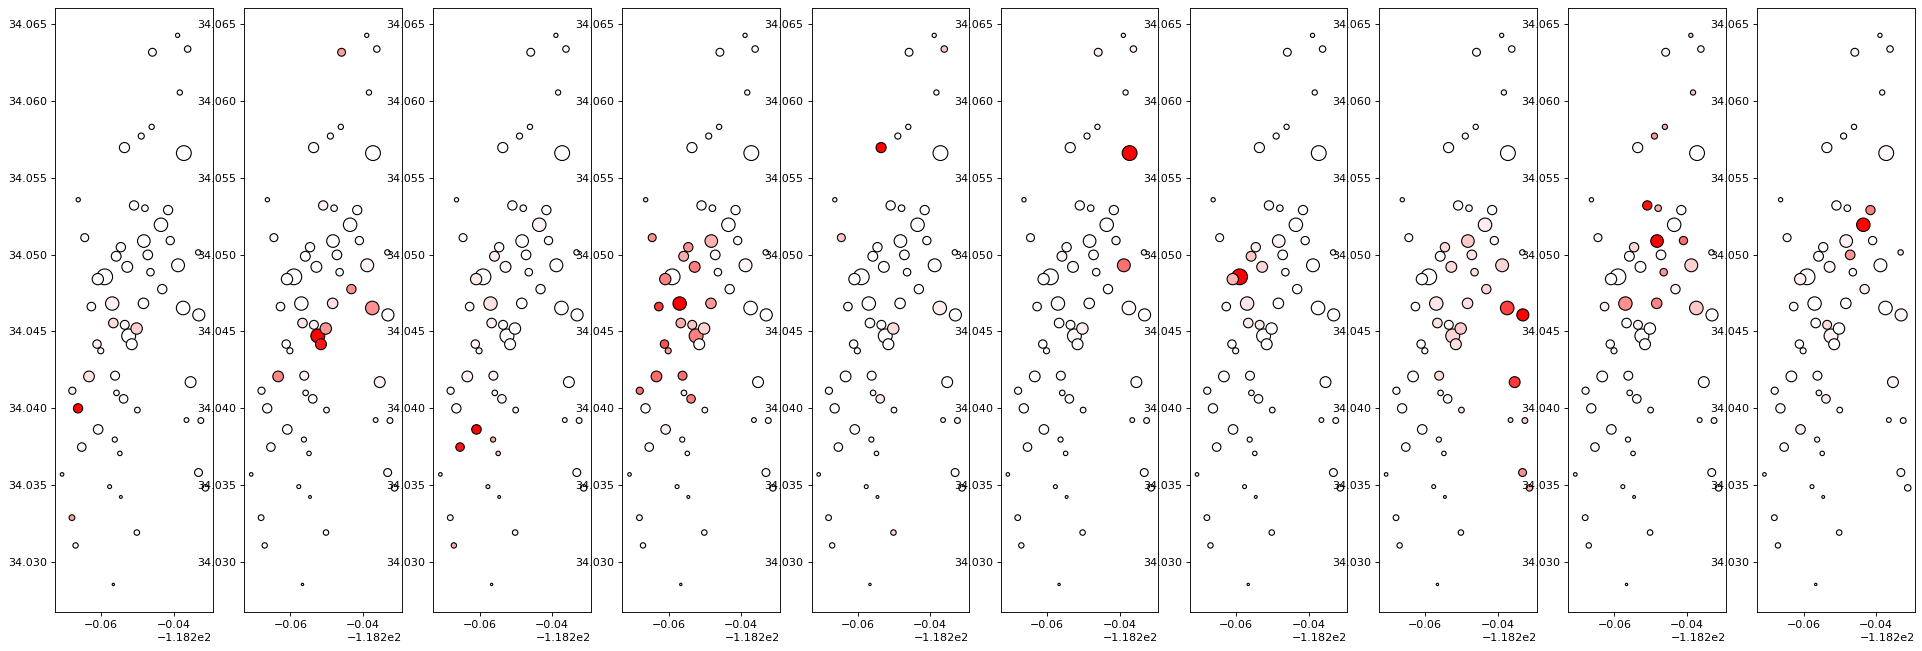

In [60]:
scatterplot_block(LAc_fit,LA_N,numblocks,np.array([list(LA_station_info[x]) for x in LA_stations])
                     ,sizes=LA_sizes,filename='TileLA'+str(10))

In [71]:
numiter=10000
numblocks=11
r0,c0=realistic_initial(NY_matrix,NY_N,numblocks)
NYr_fit, NYc_fit, wr, wc = \
gradient_descent(NY_matrix, r0, c0, N=numiter,sig_digs=3, N_stable=600, nblocks = numblocks, verbose_time = 100)

N: 	 C_RelChange 	 R_RelChange 	 log_like 	 d_log_like 	 time(s)
0	 1.3689e+01	 7.8113e-05	 -9.6575e+05	 -3.8532e+05	 1.75
100	 8.2445e-03	 3.8492e-03	 -2.1362e+05	 1.3412e+02	 186.72
200	 3.7997e-03	 2.0640e-03	 -2.0677e+05	 4.7909e+01	 365.58
300	 1.5866e-03	 2.2848e-03	 -2.0264e+05	 2.6815e+01	 540.93
400	 3.9441e-03	 1.8414e-03	 -1.9944e+05	 6.2016e+01	 716.14
500	 2.0665e-03	 2.0287e-03	 -1.9295e+05	 3.7465e+01	 888.72
600	 3.1648e-03	 1.1563e-03	 -1.8922e+05	 2.8791e+01	 1062.67
700	 1.9510e-03	 1.4775e-03	 -1.8634e+05	 2.8261e+01	 1235.68
800	 5.9513e-04	 9.2086e-04	 -1.8495e+05	 8.0117e+00	 1411.68
900	 3.3865e-04	 7.8530e-04	 -1.8441e+05	 5.5031e+00	 1592.42
1000	 5.3053e-04	 1.2778e-03	 -1.8384e+05	 8.9041e+00	 1767.77
1100	 1.0060e-03	 1.8260e-03	 -1.8273e+05	 1.7918e+01	 1950.66
1200	 1.2966e-03	 1.9687e-03	 -1.8039e+05	 2.7401e+01	 2125.69
1300	 7.5080e-04	 7.7899e-04	 -1.7923e+05	 4.5027e+00	 2314.73
1400	 3.7002e-04	 6.2698e-04	 -1.7877e+05	 3.7414e+00	 2495.29
1500	 5.5

In [111]:
def block_omegas(r,numblocks,omega_max=None,filename=None):
    if omega_max is None:
        omega_max=np.max(r)
    f,axes=plt.subplots(nrows=numblocks,ncols=numblocks,figsize=(20,10))
    colorlist=np.array([[1,0,0],[0,1,0],[0,0,1],\
                            [1,0,1],[1,1,0],[0,1,1],[0,0,0]])
    for block1 in range(0,numblocks):
        for block2 in range(0,numblocks):
            axes[block1,block2].plot(range(0,24),r[block1,block2,:],\
                                     color=[1-np.exp(-(10/omega_max)*np.max(r[block1,block2,:])),
                                            .3*np.exp(-(10/omega_max)*np.max(r[block1,block2,:]))\
                                            ,.3*np.exp(-(10/omega_max)*np.max(r[block1,block2,:]))] )
            axes[block1,block2].set_ylim(1,omega_max)
            axes[block1,block2].set_xlim(0,23)
            #axes[block1,block2].set_yscale("log")
    #f.tight_layout()
    for ax, col in zip(axes[0], range(1,numblocks+1)):
        ax.set_title("Block-"+str(col),color=colorlist[(col-1)%7])
    
    for ax, row in zip(axes[:,0], range(1,numblocks+1)):
        ax.set_ylabel("Block-"+str(row), rotation=0, size='large',color=colorlist\
                      [(row-1)%7])
    
    if not(filename is None):
        plt.savefig(filename+"block_omegas.png")

11


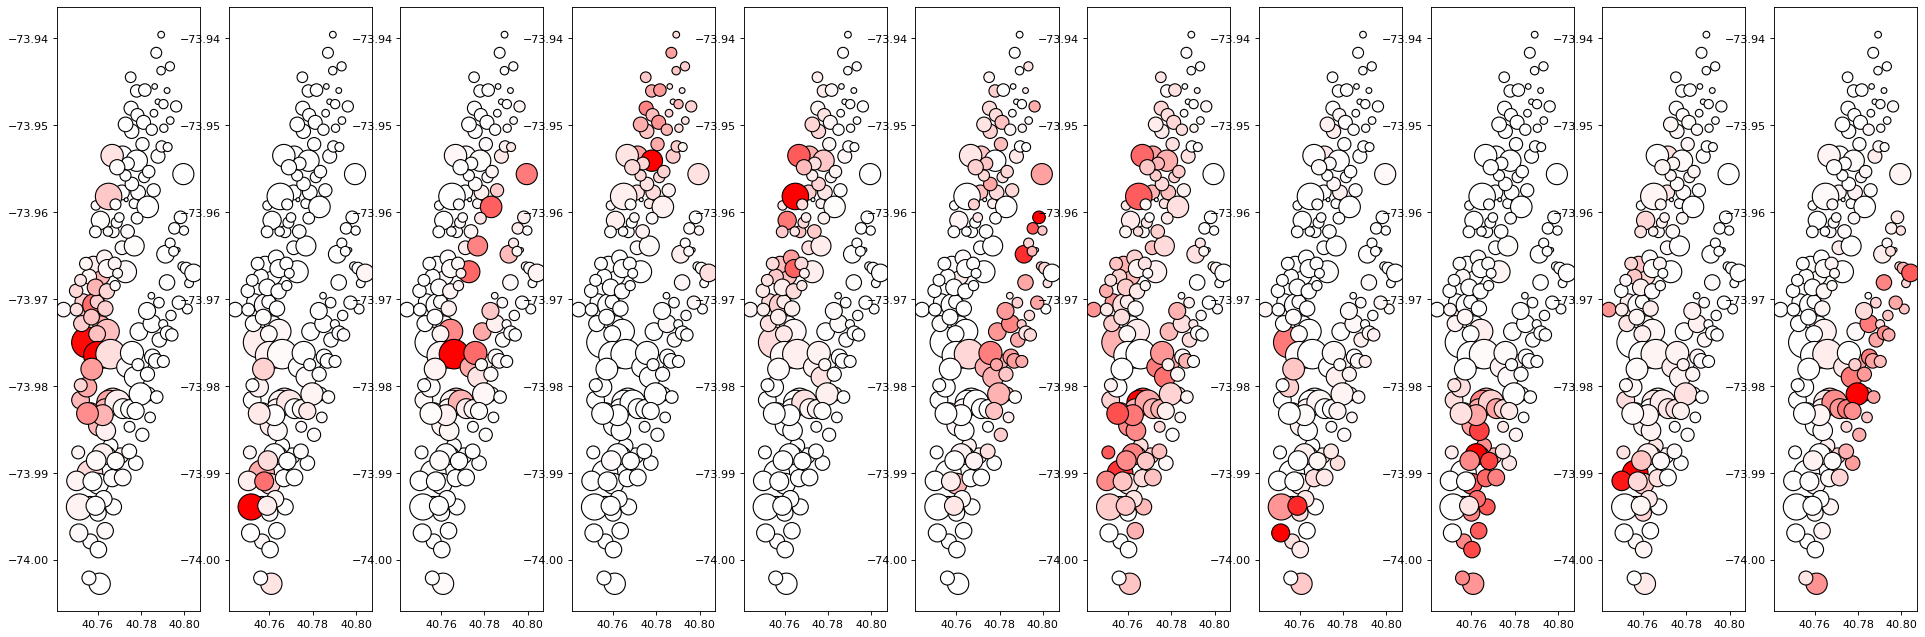

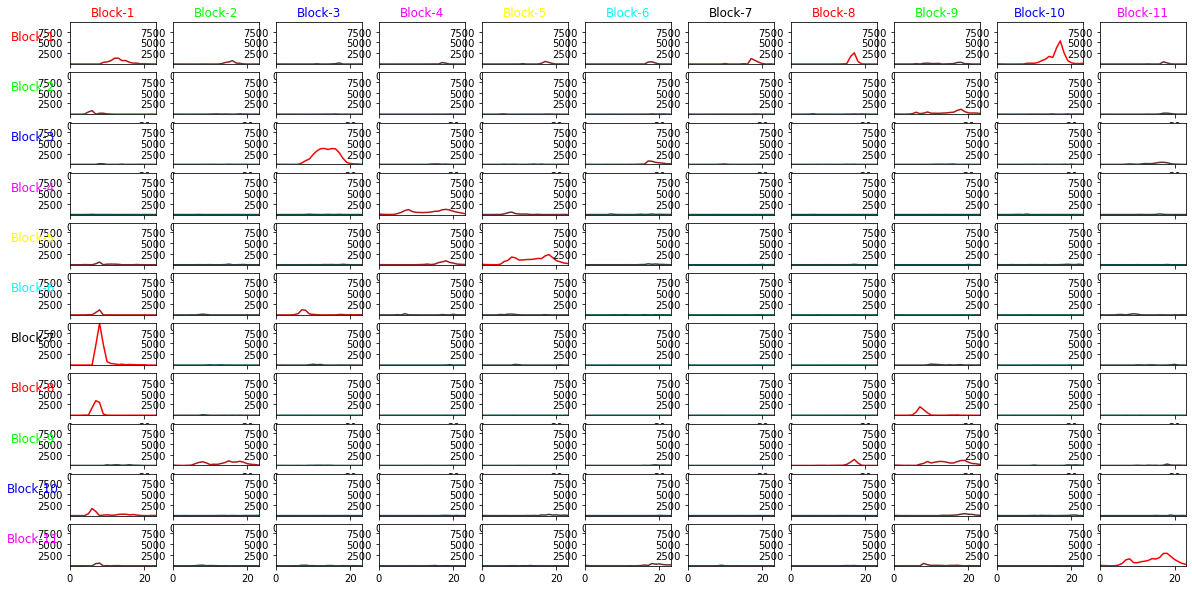

In [112]:
NY_weights=np.sum(NY_matrix,(1,2))+np.sum(NY_matrix,(0,2))
NY_sizes=NY_weights/15;
NY_colors=NYc_fit/np.max(NYc_fit,0,keepdims=True)
scatterplot_block(NYc_fit,NY_N,numblocks,np.array([list(NY_station_info[x]) for x in NY_stations])
                     ,sizes=NY_sizes)
block_omegas(NYr_fit,numblocks)

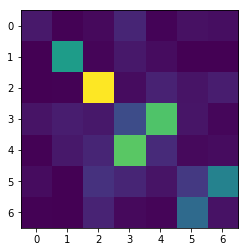

In [32]:

plt.subplot()
plt.imshow(np.sum(LAr_fit7,2))